# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime

#initialize a variable for the date
now = datetime.datetime.now()

# Import API key
from api_keys import api_key

#Import cities from csv
city_list = pd.read_csv("worldcities.csv")

#Choose a random sample of 1500 cities
random_cities = city_list.sample(n=1500)


In [2]:

#view dataframe of random cities
random_cities.head()

,Country,City,Latitude,Longitude
42044,us,irondale,33.538056,-86.707222
23808,mx,frontera,18.425000,-92.833333
46162,us,waupun,43.633333,-88.729444
31668,pt,meadela,41.706541,-8.796279
39775,sl,moyamba,8.166667,-12.433333


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create a series of cities
city_search_list = random_cities.City


In [4]:
#create several lists to hold raw data
name = []
clouds = []
date = []
humidity = []
temp_max = []
wind_speed = []

#log the length of the series
list_len = len(city_search_list)

#specify the base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#set the measurement system
units = "imperial"

#initialize a variable for the record count
record_cnt = 1

#create a loop to get the information for all the cities and add them to the lists
#also add error handling
for city in city_search_list:
    print(f"Processing Record {record_cnt} of {list_len} | {city}")
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    response = requests.get(query_url).json()
    
    try:
        name.append(response["name"].lower())
    except KeyError:
        print("That key doesn't exist")
        
    try:
        clouds.append(response["clouds"]["all"])
    except KeyError:
        print("That key doesn't exist")
            
    try:
        date.append(response["dt"])
    except KeyError:
        print("That key doesn't exist")
                
    try:
        humidity.append(response["main"]["humidity"])
    except KeyError:
        print("That key doesn't exist")
                    
    try:
        temp_max.append(response["main"]["temp_max"])
    except KeyError:
        print("That key doesn't exist")
                        
    try:
        wind_speed.append(response["wind"]["speed"])
    except KeyError:
        print("That key doesn't exist")
        
    #iterate the record count on each loop
    record_cnt = record_cnt + 1


Processing Record 1 of 1500 | irondale
Processing Record 2 of 1500 | frontera
Processing Record 3 of 1500 | waupun
Processing Record 4 of 1500 | meadela
Processing Record 5 of 1500 | moyamba
Processing Record 6 of 1500 | crab hill
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 7 of 1500 | kendall
Processing Record 8 of 1500 | gambita
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 9 of 1500 | langelsheim
Processing Record 10 of 1500 | kisai
Processing Record 11 of 1500 | borova
Processing Record 12 of 1500 | sahuayo
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 13 of 1500 | frederico westphalen
Processing Record 14 of 1500 | raiganj
Processing Record 15 of 1500 | l

Processing Record 144 of 1500 | vasilyevskiy mokh
Processing Record 145 of 1500 | westbury
Processing Record 146 of 1500 | bad sackingen
Processing Record 147 of 1500 | tlatenchi
Processing Record 148 of 1500 | ahualulco
Processing Record 149 of 1500 | wisch
Processing Record 150 of 1500 | banyo
Processing Record 151 of 1500 | cascina
Processing Record 152 of 1500 | kiras vrisi
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 153 of 1500 | velagici
Processing Record 154 of 1500 | cherkizovo
Processing Record 155 of 1500 | dieburg
Processing Record 156 of 1500 | zaragoza
Processing Record 157 of 1500 | lafayette
Processing Record 158 of 1500 | aalborg
Processing Record 159 of 1500 | bhainsa
Processing Record 160 of 1500 | guipavas
Processing Record 161 of 1500 | kambarka
Processing Record 162 of 1500 | paonta sahib
Processing Record 163 of 1500 | masuri
Processing Record 164 of 150

Processing Record 302 of 1500 | muborak
Processing Record 303 of 1500 | yuryevets
Processing Record 304 of 1500 | sona
Processing Record 305 of 1500 | panglao
Processing Record 306 of 1500 | valcelele
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 307 of 1500 | pesceana
Processing Record 308 of 1500 | saschiz
Processing Record 309 of 1500 | gherta mica
Processing Record 310 of 1500 | dragoesti
Processing Record 311 of 1500 | alekseyevskaya
Processing Record 312 of 1500 | west fargo
Processing Record 313 of 1500 | miramas
Processing Record 314 of 1500 | tounan
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 315 of 1500 | banugao
Processing Record 316 of 1500 | vagiulesti
Processing Record 317 of 1500 | point pedro
Processing Record 318 of 1500 | balasesti
Processing Record 

Processing Record 457 of 1500 | coon rapids
Processing Record 458 of 1500 | seeheim-jugenheim
Processing Record 459 of 1500 | geneva
Processing Record 460 of 1500 | jaguimitan
Processing Record 461 of 1500 | sitagroi
Processing Record 462 of 1500 | gerga
Processing Record 463 of 1500 | folkestone
Processing Record 464 of 1500 | canaman
Processing Record 465 of 1500 | zabolottya
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 466 of 1500 | trento
Processing Record 467 of 1500 | sakhon nakhon
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 468 of 1500 | katpadi
Processing Record 469 of 1500 | kurchaloy
Processing Record 470 of 1500 | santa rita
Processing Record 471 of 1500 | urupes
Processing Record 472 of 1500 | lonevag
Processing Record 473 of 1500 | sable-sur-sarthe
Proce

Processing Record 620 of 1500 | havelock
Processing Record 621 of 1500 | ula
Processing Record 622 of 1500 | new norfolk
Processing Record 623 of 1500 | yamoussoukro
Processing Record 624 of 1500 | kawaguchi
Processing Record 625 of 1500 | godre
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 626 of 1500 | custoias
Processing Record 627 of 1500 | karancskeszi
Processing Record 628 of 1500 | pordim
Processing Record 629 of 1500 | tomar do geru
Processing Record 630 of 1500 | quatre bornes
Processing Record 631 of 1500 | argel
Processing Record 632 of 1500 | torrance
Processing Record 633 of 1500 | wohlen
Processing Record 634 of 1500 | sumpong
Processing Record 635 of 1500 | enghien
Processing Record 636 of 1500 | marinha grande
Processing Record 637 of 1500 | seekonk
Processing Record 638 of 1500 | irinjalakuda
Processing Record 639 of 1500 | kamphaeng phet
Processing Record 640 

Processing Record 781 of 1500 | guarare
Processing Record 782 of 1500 | pinneberg
Processing Record 783 of 1500 | chivolo
Processing Record 784 of 1500 | neon rision
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 785 of 1500 | el perico
Processing Record 786 of 1500 | garmisch-partenkirchen
Processing Record 787 of 1500 | aberdeen
Processing Record 788 of 1500 | pierreville
Processing Record 789 of 1500 | bailen
Processing Record 790 of 1500 | cetatea de balta
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 791 of 1500 | neder holluf
Processing Record 792 of 1500 | faros
Processing Record 793 of 1500 | hirson
Processing Record 794 of 1500 | cortalim
Processing Record 795 of 1500 | gzira
Processing Record 796 of 1500 | peski
Processing Record 797 of 1500 | sayreville
Proces

Processing Record 938 of 1500 | toliary
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 939 of 1500 | caconde
Processing Record 940 of 1500 | wangqing
Processing Record 941 of 1500 | bell
Processing Record 942 of 1500 | pulo
Processing Record 943 of 1500 | eston
Processing Record 944 of 1500 | gdynia
Processing Record 945 of 1500 | palestina de los altos
Processing Record 946 of 1500 | guinsiliban
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 947 of 1500 | otacilio costa
Processing Record 948 of 1500 | santa maria
Processing Record 949 of 1500 | iruma
Processing Record 950 of 1500 | edessa
Processing Record 951 of 1500 | guapiacu
Processing Record 952 of 1500 | ispica
Processing Record 953 of 1500 | bakonyszentlaszlo
Processing Record 954 of 1500 | ricany
Processing Recor

Processing Record 1095 of 1500 | lee
Processing Record 1096 of 1500 | gretna
Processing Record 1097 of 1500 | muhororo
Processing Record 1098 of 1500 | guimbal
Processing Record 1099 of 1500 | new brunswick
Processing Record 1100 of 1500 | tigveni
Processing Record 1101 of 1500 | kose-uuemoisa
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
Processing Record 1102 of 1500 | komarno
Processing Record 1103 of 1500 | sarmasu
Processing Record 1104 of 1500 | asifabad
Processing Record 1105 of 1500 | santiago
Processing Record 1106 of 1500 | susegana
Processing Record 1107 of 1500 | la dorada
Processing Record 1108 of 1500 | vasylivka
Processing Record 1109 of 1500 | nagamangala
Processing Record 1110 of 1500 | rayevskaya
Processing Record 1111 of 1500 | kitangari
Processing Record 1112 of 1500 | saipipi
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key doesn't exist
That key

Processing Record 1257 of 1500 | baska
Processing Record 1258 of 1500 | hildesheim
Processing Record 1259 of 1500 | vlist
Processing Record 1260 of 1500 | kurya
Processing Record 1261 of 1500 | la union
Processing Record 1262 of 1500 | avram iancu
Processing Record 1263 of 1500 | southfield
Processing Record 1264 of 1500 | high river
Processing Record 1265 of 1500 | bergisch gladbach
Processing Record 1266 of 1500 | daloa
Processing Record 1267 of 1500 | colinas
Processing Record 1268 of 1500 | soskovo
Processing Record 1269 of 1500 | sirohi
Processing Record 1270 of 1500 | vorotynsk
Processing Record 1271 of 1500 | hermanus
Processing Record 1272 of 1500 | south laurel
Processing Record 1273 of 1500 | three hills
Processing Record 1274 of 1500 | feira
Processing Record 1275 of 1500 | hakui
Processing Record 1276 of 1500 | jiquilpan
Processing Record 1277 of 1500 | rodopolis
Processing Record 1278 of 1500 | yining
Processing Record 1279 of 1500 | depok
Processing Record 1280 of 1500 | 

Processing Record 1422 of 1500 | nagas
Processing Record 1423 of 1500 | rehoboth
Processing Record 1424 of 1500 | quibal
Processing Record 1425 of 1500 | shnogh
Processing Record 1426 of 1500 | xuanwu
Processing Record 1427 of 1500 | ocean city
Processing Record 1428 of 1500 | shelkovskaya
Processing Record 1429 of 1500 | kupang
Processing Record 1430 of 1500 | bureya
Processing Record 1431 of 1500 | gujrat
Processing Record 1432 of 1500 | bad gandersheim
Processing Record 1433 of 1500 | nanesti
Processing Record 1434 of 1500 | sacavem
Processing Record 1435 of 1500 | san miguel
Processing Record 1436 of 1500 | kaohsiung
Processing Record 1437 of 1500 | khujand
Processing Record 1438 of 1500 | antioquia
Processing Record 1439 of 1500 | jilin
Processing Record 1440 of 1500 | general teran
Processing Record 1441 of 1500 | nhamunda
Processing Record 1442 of 1500 | petelea
Processing Record 1443 of 1500 | auraiya
Processing Record 1444 of 1500 | vergara
Processing Record 1445 of 1500 | diy

In [5]:
#create a dictionary from the raw data
raw_weather_data = {"City": name,
                   "Cloudiness": clouds,
                   "Date": date,
                   "Humidity": humidity,
                   "Max Temp": temp_max,
                   "Wind Speed": wind_speed}

#create a datafram from the dictionary
weather_data = pd.DataFrame(raw_weather_data)

In [6]:
#merge the dataframe with the lats and longs with the dataframe with the weather information
city_weather_data = pd.merge(weather_data,random_cities, on="City")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

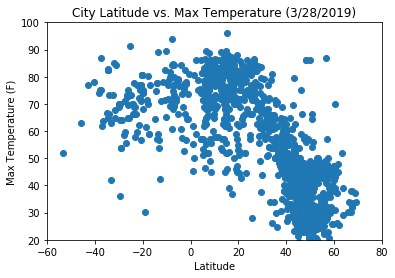

<Figure size 432x288 with 0 Axes>

In [7]:
#create a scatterplot, lable it and save it as a png file
x_axis = city_weather_data["Latitude"]
y_axis = city_weather_data["Max Temp"]
plt.xlim(-60,80)
plt.ylim(20,100)
plt.scatter(x_axis,y_axis,marker="o")
plt.title(f"City Latitude vs. Max Temperature ({now.month}/{now.day}/{now.year})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.show()
plt.savefig('LatvsTemp.png')

#### Latitude vs. Humidity Plot

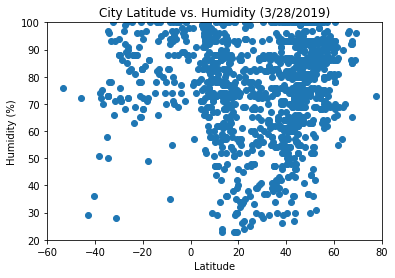

<Figure size 432x288 with 0 Axes>

In [8]:
#create a scatterplot, lable it and save it as a png file
x_axis = city_weather_data["Latitude"]
y_axis = city_weather_data["Humidity"]
plt.xlim(-60,80)
plt.ylim(20,100)
plt.scatter(x_axis,y_axis,marker="o")
plt.title(f"City Latitude vs. Humidity ({now.month}/{now.day}/{now.year})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()
plt.savefig('LatvsHumid.png')


#### Latitude vs. Cloudiness Plot

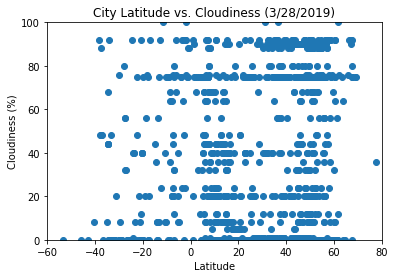

<Figure size 432x288 with 0 Axes>

In [9]:
#create a scatterplot, lable it and save it as a png file
x_axis = city_weather_data["Latitude"]
y_axis = city_weather_data["Cloudiness"]
plt.xlim(-60,80)
plt.ylim(0,100)
plt.scatter(x_axis,y_axis,marker="o")
plt.title(f"City Latitude vs. Cloudiness ({now.month}/{now.day}/{now.year})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()
plt.savefig('LatvsClouds.png')


#### Latitude vs. Wind Speed Plot

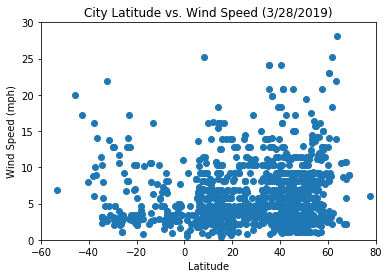

<Figure size 432x288 with 0 Axes>

In [10]:
#create a scatterplot, lable it and save it as a png file
x_axis = city_weather_data["Latitude"]
y_axis = city_weather_data["Wind Speed"]
plt.xlim(-60,80)
plt.ylim(0,30)
plt.scatter(x_axis,y_axis,marker="o")
plt.title(f"City Latitude vs. Wind Speed ({now.month}/{now.day}/{now.year})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()
plt.savefig('LatvsWind.png')


Here are three observable trends that I have noticed.

1. First it seems like most of the weather activity is in the northern hemisphere.  This is probably because of the tilt of the Earth and because the northern hemisphere is heading into the warmer months.

2. The max temperatures are concentrated in the northern hemisphere and this is because there is more population in the northern hemisphere and thus more cities.

3. Humidity is concentrated in the temperate to tropical regions and more so in the northern hemisphere.

Bonus: There is a weird pattern in the cloudiness plot and I am not sure what it means.